# Preparation

In [1]:
# This file is based on: 0_regression_presence_of_accident
# Remove features which were found correlated with others
# Remove the categorical features which has only two categories

In [2]:
import torch
torch.cuda.empty_cache() 

In [3]:
import os 
os.environ['MPLCONFIGDIR'] = os.getcwd() + "/configs/"
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import cv2
import urllib.request
from PIL import Image

In [4]:
import pandas as pd
import pyproj

In [5]:
import os 
os.environ['MPLCONFIGDIR'] = os.getcwd() + "/configs/"
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [6]:
from pathlib import Path
import sklearn
import seaborn as sn
from scipy import stats
from tabulate import tabulate
import statsmodels.api as sm
import statsmodels.tools as tools

In [7]:
from mtp_function_yl import *

In [8]:
import sklearn
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split

from sklearn import linear_model

from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import LabelEncoder

from sklearn import svm

import seaborn as sn


# For regression
from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import PredictionErrorDisplay

import mlxtend
# For stepwise feature selection
from mlxtend.feature_selection import SequentialFeatureSelector
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

In [9]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [10]:
# For documentation and version control
# pip install watermark
%load_ext watermark

In [11]:
%watermark  -u -d -v -m --iversions

Last updated: 2024-10-04

Python implementation: CPython
Python version       : 3.11.5
IPython version      : 8.14.0

Compiler    : GCC 12.3.0
OS          : Linux
Release     : 5.15.0-119-generic
Machine     : x86_64
Processor   : x86_64
CPU cores   : 126
Architecture: 64bit

torch      : 2.0.1
cv2        : 4.8.1
sklearn    : 1.3.0
pyproj     : 3.6.1
pandas     : 2.0.3
statsmodels: 0.14.0
shapely    : 2.0.2
numpy      : 1.26.4
matplotlib : 3.7.2
mlxtend    : 0.23.1
PIL        : 10.0.0
scipy      : 1.11.2
seaborn    : 0.12.2



# Data loading

## For science cluster environment

In [12]:
aa = pd.read_csv('/home/yelhe/script/mt/dataraw/dfaa.csv')

In [13]:
acv = pd.read_csv('/home/yelhe/script/mt/model/allvariable_accident.csv')
rpv = pd.read_csv('/home/yelhe/script/mt/model/allvariable_rp.csv')

In [14]:
# same size
acv0 = acv.drop(['SV','LV','pd','svp','lvp','pdp'], axis = 1)
acv0 = acv0.assign(acp = 1)
acv0 = acv0.rename(columns = {'Nr':'id'})

In [15]:
rpv0 = rpv.drop(['speedlimit_7', 'z_qnr_34'], axis = 1)
rpv0 = rpv0.assign(acp = 0)

In [16]:
dfacrpv = pd.concat([acv0, rpv0])

In [17]:
len(dfacrpv.columns.values)

110

In [18]:
# dfacrpv.to_csv('/home/yelhe/script/mt/model/dfacrpv.csv', index = False)

## Pre Processing

In [19]:
cn = ['cp', 'ie', 'iemin', 'iemax', 'mew', 'mewmin', 'mewmax', 'meg', 
      'megmin', 'megmax', 'cmean', 'cmin', 'cmax', 'dbusl', 'dtraml', 
      'dtrainl', 'dplight', 'dstation', 'dparkcar', 'dparktw', 'dpedcro', 'dstopsign', 'dcurb',
      'dtrafficarea', 'droad', 'dvfpath', 'gvm_dwv', 'gvm_msp', 'gvm_asp', 'r_width_value',
      'speedlimit_value', 'curbtype_1', 'curbtype_2', 'z_qnr_1', 'z_qnr_2', 'z_qnr_3', 'z_qnr_4', 'z_qnr_5',
      'z_qnr_6', 'z_qnr_7', 'z_qnr_8', 'z_qnr_9', 'z_qnr_10', 'z_qnr_11', 'z_qnr_12', 'z_qnr_13',
      'z_qnr_14', 'z_qnr_15', 'z_qnr_16', 'z_qnr_17', 'z_qnr_18',
      'z_qnr_19', 'z_qnr_20', 'z_qnr_21', 'z_qnr_22', 'z_qnr_23', 'z_qnr_24',
       'z_qnr_25', 'z_qnr_26', 'z_qnr_27', 'z_qnr_28', 'z_qnr_29', 'z_qnr_30',
       'z_qnr_31', 'z_qnr_32', 'z_qnr_33', 'z_knr_1', 'z_knr_2', 'z_knr_3',
       'z_knr_4', 'z_knr_5', 'z_knr_6', 'z_knr_7', 'z_knr_8', 'z_knr_9',
       'z_knr_10', 'z_knr_11', 'z_knr_12', 'trafficarea_1', 'trafficarea_2',
       'trafficarea_3', 'r_width_1', 'r_width_2', 'r_width_3', 'r_width_4',
       'r_width_5', 'r_width_6', 'r_width_7', 'r_surface_1', 'r_surface_2',
       'speedlimit_1', 'speedlimit_2', 'speedlimit_3', 'speedlimit_4',
       'speedlimit_5', 'speedlimit_6', 'bicyclecount', 'carcount']

# Remove id, droad_sl ,'d_bicyclecount' 'd_carcount' 'curbtype'  
# 'z_qnr' 'z_knr'  'trafficarea'
# 'r_width''r_surface' 'speedlimit'

In [20]:
# remove features which has correlation <-0.8 or > 0.8

In [21]:
# correlation analysis result
dfcorr = pd.read_csv('/home/yelhe/script/mtp/tables/sorted_unique_corrpairs.csv')

In [22]:
dfcorr.columns

Index(['Unnamed: 0', 'Unnamed: 1', '0'], dtype='object')

In [23]:
dfcorr = dfcorr.rename(columns = {'Unnamed: 0':'feature1', 'Unnamed: 1':'feature2',
                                  '0':'correlation'})

In [24]:
dfcorr_high = dfcorr.loc[(dfcorr['correlation'] <= -0.8) | (dfcorr['correlation'] >= 0.8)]

In [25]:
dfcorr_high

,feature1,feature2,correlation
0,curbtype_2,curbtype_1,-1.000000
1,r_surface_2,r_surface_1,-1.000000
2,speedlimit_2,speedlimit_value,-0.843848
4742,mewmax,mew,0.843518
4743,megmin,meg,0.859393
4744,mewmin,mew,0.861981
4745,cmean,cp,0.906091
4746,iemax,ie,0.919919
4747,cmax,cp,0.940030
4748,iemin,ie,0.957061


In [26]:
# remove based on correlation
# speedlimit_2, 
# mewmax, mewmin, megmin, iemax, iemin, 
# cmean, cmax, gvm_ asp, gvm_msp

# remove based on data source
# dcurb (correlated to droad, and based on concept model), curbtype_1

# Only n-1 dummy variables are needed for n-category variable
# remove
# r_width_7, speedlimit_6, z_qnr_33, z_knr_12, trafficarea_3, curbtype_2, r_surface_2

# updated 
cnu = ['cp', 'ie', 'mew', 'meg', 
       'megmax', 'cmin', 'dbusl', 'dtraml','dtrainl', 'dplight', 'dstation', 
       'dparkcar', 'dparktw', 'dpedcro', 'dstopsign',
       'dtrafficarea', 'droad', 'dvfpath', 'gvm_dwv', 'bicyclecount', 'carcount',
       'r_width_value','speedlimit_value',  
       'z_qnr_1', 'z_qnr_2', 'z_qnr_3', 'z_qnr_4', 'z_qnr_5','z_qnr_6', 
       'z_qnr_7', 'z_qnr_8', 'z_qnr_9', 'z_qnr_10', 'z_qnr_11', 'z_qnr_12', 
       'z_qnr_13', 'z_qnr_14', 'z_qnr_15', 'z_qnr_16', 'z_qnr_17', 'z_qnr_18',
       'z_qnr_19', 'z_qnr_20', 'z_qnr_21', 'z_qnr_22', 'z_qnr_23', 'z_qnr_24',
       'z_qnr_25', 'z_qnr_26', 'z_qnr_27', 'z_qnr_28', 'z_qnr_29', 'z_qnr_30',
       'z_qnr_31', 'z_qnr_32', 'z_knr_1', 'z_knr_2', 'z_knr_3',
       'z_knr_4', 'z_knr_5', 'z_knr_6', 'z_knr_7', 'z_knr_8', 'z_knr_9',
       'z_knr_10', 'z_knr_11', 'trafficarea_1', 'trafficarea_2',
       'r_width_1', 'r_width_2', 'r_width_3', 'r_width_4',
       'r_width_5', 'r_width_6', 'r_surface_1', 
       'speedlimit_1', 'speedlimit_3', 'speedlimit_4',
       'speedlimit_5']

In [27]:
y = dfacrpv['acp']
x = dfacrpv[cnu]

In [28]:
# y.shape
x.shape
# 1087 points with 78 features in total

(1087, 79)

# Orginal regression model without feature selection

In [29]:
# Using updated features collection (84 instead of 98)

## OLS linear regression

### Without data splitting

In [30]:
# OLS
# With constant
x_const = tools.add_constant(x)
m00 = sm.OLS(y, x_const)
r00 = m00.fit()
r00.summary()

# m00 = sm.OLS(y, x)
# r00 = m00.fit()
# r00.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    acp   R-squared:                       0.621
Model:                            OLS   Adj. R-squared:                  0.591
Method:                 Least Squares   F-statistic:                     20.89
Date:                Fri, 04 Oct 2024   Prob (F-statistic):          1.03e-161
Time:                        17:55:16   Log-Likelihood:                -134.06
No. Observations:                1087   AIC:                             428.1
Df Residuals:                    1007   BIC:                             827.4
Df Model:                          79                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0504      0.171      0.294      0.769      -0.286       0.387
cp                  -0.0136      0.020     -0.690      0.490      -0.052       0.025
ie                  -0.0139      0.009     -1.475      0.140      -0.032       0.005
mew                  0.0178      0.010      1.789      0.074      -0.002       0.037
meg                 -0.0005      0.014     -0.033      0.974      -0.029       0.028
megmax               0.0113      0.014      0.823      0.411      -0.016       0.038
cmin                -0.0065      0.009     -0.721      0.471      -0.024       0.011
dbusl               -0.0164      0.012     -1.391      0.164      -0.040       0.007
dtraml               0.0194      0.012      1.557      0.120      -0.005       0.044
dtrainl              0.0215      0.011      1.908      0.057      -0.001       0.044
dplight              0.0145      0.010      1.474      0.141      -0.005       0.034
dstation             0.0030      0.011      0.262      0.793      -0.020       0.026
dparkcar            -0.0045      0.012     -0.386      0.699      -0.027       0.018
dparktw             -0.0071      0.011     -0.653      0.514      -0.029       0.014
dpedcro             -0.0013      0.011     -0.123      0.902      -0.023       0.020
dstopsign            0.0329      0.012      2.635      0.009       0.008       0.057
dtrafficarea         0.0161      0.014      1.131      0.258      -0.012       0.044
droad               -0.0060      0.010     -0.594      0.553      -0.026       0.014
dvfpath             -0.0146      0.009     -1.545      0.123      -0.033       0.004
gvm_dwv             -0.0044      0.011     -0.390      0.696      -0.027       0.018
bicyclecount        -0.0048      0.011     -0.454      0.650      -0.026       0.016
carcount             0.0038      0.011      0.358      0.720      -0.017       0.024
r_width_value       -0.1341      0.021     -6.326      0.000      -0.176      -0.093
speedlimit_value    -0.0515      0.020     -2.594      0.010      -0.090      -0.013
z_qnr_1              0.7993      0.133      6.017      0.000       0.539       1.060
z_qnr_2              0.5209      0.122      4.286      0.000       0.282       0.759
z_qnr_3              0.5627      0.123      4.576      0.000       0.321       0.804
z_qnr_4              0.6372      0.131      4.882      0.000       0.381       0.893
z_qnr_5              0.5812      0.103      5.670      0.000       0.380       0.782
z_qnr_6              0.4157      0.125      3.321      0.001       0.170       0.661
z_qnr_7              0.9022      0.120      7.527      0.000       0.667       1.137
z_qnr_8              0.7707      0.103      7.490      0.000       0.569       0.973
z_qnr_9              0.6521      0.137      4.775      0.000       0.384       0.920
z_qnr_10            -0.

0.9144434222631095

Test accuracy : 
 0.9144434222631095

Confusion Matrix : 
 [[768  24]
 [ 69 226]]


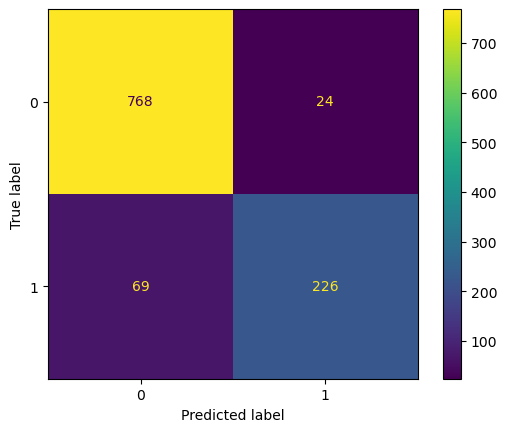

In [31]:
pred00 = r00.predict(x_const)
pred00 = list(map(round,pred00))
print(accuracy_score(y, pred00))
print('\nTest accuracy : \n', accuracy_score(y, pred00))
cm00 = confusion_matrix(y, pred00) 
print ('\nConfusion Matrix : \n', cm00)
cm00_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm00)
cm00_display.plot()

In [32]:
acc_ols = metrics.accuracy_score(y, pred00)
print('accuracy', acc_ols)

pre_ols = metrics.precision_score(y, pred00, average = None)
print('precision', pre_ols)

senrec_ols = metrics.recall_score(y, pred00, average = None)
print('sensitivity recall', senrec_ols)

f1_ols = metrics.f1_score(y, pred00, average = None)
print('f1 score', f1_ols)

pre_ols_m = np.mean(pre_ols)
senrec_ols_m = np.mean(senrec_ols)
f1_ols_m = np.mean(f1_ols)
print('mean precision', pre_ols_m)
print('mean recall', senrec_ols_m)
print('mean f1 score', f1_ols_m)

accuracy 0.9144434222631095
precision [0.91756272 0.904     ]
sensitivity recall [0.96969697 0.76610169]
f1 score [0.94290976 0.8293578 ]
mean precision 0.9107813620071685
mean recall 0.8678993323061119
mean f1 score 0.8861337793772281


### With data splitting

In [33]:
# OLS
X_train, X_test, y_train, y_test = train_test_split(
        x_const, y,
        test_size=0.3,
        random_state=2)

m00_split = sm.OLS(y_train, X_train)
r00_split = m00_split.fit()
r00_split.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    acp   R-squared:                       0.635
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     14.98
Date:                Fri, 04 Oct 2024   Prob (F-statistic):          3.00e-104
Time:                        17:55:39   Log-Likelihood:                -85.906
No. Observations:                 760   AIC:                             331.8
Df Residuals:                     680   BIC:                             702.5
Df Model:                          79                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.2672      0.229     -1.169      0.243      -0.716       0.182
cp                   0.0152      0.024      0.640      0.522      -0.031       0.062
ie                  -0.0151      0.011     -1.324      0.186      -0.037       0.007
mew                  0.0259      0.012      2.189      0.029       0.003       0.049
meg                  0.0078      0.018      0.445      0.657      -0.027       0.042
megmax               0.0181      0.017      1.082      0.280      -0.015       0.051
cmin                -0.0089      0.010     -0.932      0.352      -0.028       0.010
dbusl               -0.0037      0.014     -0.258      0.796      -0.032       0.024
dtraml               0.0204      0.016      1.312      0.190      -0.010       0.051
dtrainl              0.0202      0.014      1.458      0.145      -0.007       0.047
dplight              0.0105      0.012      0.884      0.377      -0.013       0.034
dstation             0.0048      0.014      0.346      0.730      -0.022       0.032
dparkcar            -0.0090      0.014     -0.633      0.527      -0.037       0.019
dparktw              0.0049      0.013      0.370      0.711      -0.021       0.031
dpedcro             -0.0034      0.013     -0.259      0.796      -0.030       0.023
dstopsign            0.0210      0.016      1.353      0.176      -0.009       0.051
dtrafficarea         0.0300      0.018      1.712      0.087      -0.004       0.064
droad                0.0069      0.013      0.536      0.592      -0.018       0.032
dvfpath             -0.0190      0.013     -1.498      0.135      -0.044       0.006
gvm_dwv             -0.0136      0.014     -0.997      0.319      -0.040       0.013
bicyclecount        -0.0144      0.013     -1.130      0.259      -0.039       0.011
carcount             0.0077      0.013      0.584      0.560      -0.018       0.034
r_width_value       -0.1172      0.026     -4.479      0.000      -0.169      -0.066
speedlimit_value    -0.0601      0.024     -2.534      0.011      -0.107      -0.014
z_qnr_1              0.7743      0.161      4.817      0.000       0.459       1.090
z_qnr_2              0.4832      0.158      3.057      0.002       0.173       0.794
z_qnr_3              0.6006      0.156      3.862      0.000       0.295       0.906
z_qnr_4              0.6057      0.161      3.752      0.000       0.289       0.923
z_qnr_5              0.5409      0.132      4.103      0.000       0.282       0.800
z_qnr_6              0.3804      0.150      2.535      0.011       0.086       0.675
z_qnr_7              0.9068      0.156      5.797      0.000       0.600       1.214
z_qnr_8              0.6816      0.134      5.097      0.000       0.419       0.944
z_qnr_9              0.6444      0.170      3.782      0.000       0.310       0.979
z_qnr_10            -0.


Test accuracy : 
 0.8960244648318043

Confusion Matrix : 
 [[234  10]
 [ 24  59]]


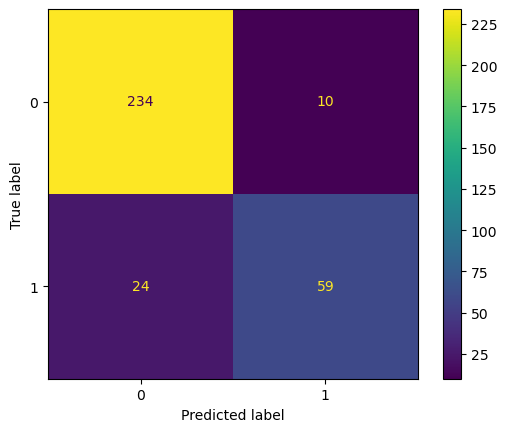

In [34]:
pred00split = r00_split.predict(X_test)
pred00split = list(map(round,pred00split))
print('\nTest accuracy : \n', accuracy_score(y_test, pred00split))
cm00split = confusion_matrix(y_test, pred00split) 
print ('\nConfusion Matrix : \n', cm00split) 
cm00split_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm00split)
cm00split_display.plot()

In [35]:
acc_ols_sp = metrics.accuracy_score(y_test, pred00split)
print('accuracy', acc_ols_sp)

pre_ols_sp = metrics.precision_score(y_test, pred00split, average = None)
print('precision', pre_ols_sp)

senrec_ols_sp = metrics.recall_score(y_test, pred00split, average = None)
print('sensitivity recall', senrec_ols_sp)

f1_ols_sp = metrics.f1_score(y_test, pred00split, average = None)
print('f1 score', f1_ols_sp)

pre_ols_sp_m = np.mean(pre_ols_sp)
senrec_ols_sp_m = np.mean(senrec_ols_sp)
f1_ols_sp_m = np.mean(f1_ols_sp)
print('mean precision', pre_ols_sp_m)
print('mean recall', senrec_ols_sp_m)
print('mean f1 score', f1_ols_sp_m)

accuracy 0.8960244648318043
precision [0.90697674 0.85507246]
sensitivity recall [0.95901639 0.71084337]
f1 score [0.93227092 0.77631579]
mean precision 0.8810246039770813
mean recall 0.8349298834682994
mean f1 score 0.8542933529041727


## Logistic regression

### Without data splitting

In [43]:

# Without constant
# m00_log = sm.Logit(y, x)
# r00_log = m00_log.fit_regularized()
# r00_log.summary()

# Add constant
x_const = tools.add_constant(x)
m00_log = sm.Logit(y,x_const, max_iter = 400)
r00_log = m00_log.fit_regularized()
# r00_log = m00_log.fit()

r00_log.summary()

/opt/conda/lib/python3.11/site-packages/statsmodels/base/model.py:130: ValueWarning: unknown kwargs ['max_iter']
  warnings.warn(msg, ValueWarning)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.17963519894652716
            Iterations: 544
            Function evaluations: 544
            Gradient evaluations: 544


/opt/conda/lib/python3.11/site-packages/statsmodels/base/model.py:130: ValueWarning: unknown kwargs ['max_iter']
  warnings.warn(msg, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    acp   No. Observations:                 1087
Model:                          Logit   Df Residuals:                     1007
Method:                           MLE   Df Model:                           79
Date:                Fri, 04 Oct 2024   Pseudo R-squ.:                  0.6927
Time:                        17:58:00   Log-Likelihood:                -195.26
converged:                       True   LL-Null:                       -635.50
Covariance Type:            nonrobust   LLR p-value:                1.309e-135
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const              -19.5750    974.543     -0.020      0.984   -1929.645    1890.495
cp                  -0.5092      0.333     -1.530      0.126      -1.161       0.143
ie                  -0.1649      0.149     -1.108      0.268      -0.456       0.127
mew                  0.4109      0.163      2.523      0.012       0.092       0.730
meg                  0.2230      0.235      0.950      0.342      -0.237       0.683
megmax              -0.0177      0.222     -0.080      0.936      -0.452       0.417
cmin                -0.0987      0.185     -0.533      0.594      -0.462       0.265
dbusl               -0.4267      0.201     -2.127      0.033      -0.820      -0.033
dtraml               0.5010      0.221      2.271      0.023       0.069       0.933
dtrainl              0.4242      0.186      2.280      0.023       0.059       0.789
dplight              0.1238      0.158      0.783      0.434      -0.186       0.434
dstation             0.0826      0.197      0.420      0.675      -0.303       0.468
dparkcar            -0.1056      0.181     -0.583      0.560      -0.461       0.250
dparktw             -0.2119      0.186     -1.138      0.255      -0.577       0.153
dpedcro             -0.0287      0.171     -0.167      0.867      -0.365       0.307
dstopsign            0.4930      0.210      2.345      0.019       0.081       0.905
dtrafficarea         0.1894      0.205      0.925      0.355      -0.212       0.591
droad               -0.1058      0.179     -0.591      0.554      -0.456       0.245
dvfpath             -0.2845      0.176     -1.616      0.106      -0.630       0.061
gvm_dwv             -0.0892      0.170     -0.526      0.599      -0.422       0.243
bicyclecount        -0.3509      0.180     -1.944      0.052      -0.705       0.003
carcount             0.1421      0.173      0.820      0.412      -0.198       0.482
r_width_value       -1.7606      0.353     -4.983      0.000      -2.453      -1.068
speedlimit_value    -0.5239      0.432     -1.213      0.225      -1.371       0.323
z_qnr_1             15.0330      2.704      5.560      0.000       9.734      20.332
z_qnr_2              8.1528      2.325      3.507      0.000       3.596      12.709
z_qnr_3             10.8552      2.493      4.355      0.000       5.970      15.741
z_qnr_4             12.4778      2.735      4.562      0.000       7.117      17.838
z_qnr_5              8.7568      2.208      3.965      0.000       4.429      13.085
z_qnr_6              9.3274      3.355      2.780      0.005       2.751      15.903
z_qnr_7             13.2912      2.332      5.700      0.000       8.721      17.861
z_qnr_8             12.5813      2.228      5.646      0.000       8.214      16.949
z_qnr_9             11.6207      2.683      4.332      0.000       6.363      16.879
z_qnr_10             1.9400      2.161      0.898      0.369      -2.295       6.175
z_qnr_11             9.1446      2.090      4.376      0.000       5.049      13.240
z_qnr_12   

0.9310027598896045

Test accuracy : 
 0.9310027598896045

Confusion Matrix : 
 [[763  29]
 [ 46 249]]
accuracy 0.9310027598896045
precision [0.94313968 0.89568345]
sensitivity recall [0.96338384 0.8440678 ]
f1 score [0.95315428 0.86910995]
mean precision 0.9194115659264924
mean recall 0.903725817497004
mean f1 score 0.9111321131099346


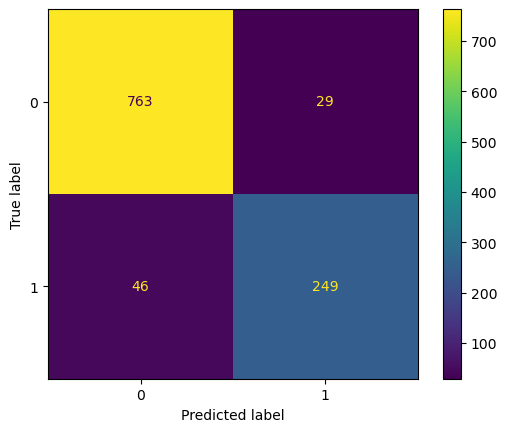

In [37]:
pred00log = r00_log.predict(x_const)
pred00log = list(map(round,pred00log))
print(accuracy_score(y, pred00log))
print('\nTest accuracy : \n', accuracy_score(y, pred00log))
cm00log = confusion_matrix(y, pred00log) 
print ('\nConfusion Matrix : \n', cm00log)
cm00log_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm00log)
cm00log_display.plot()

acc_log = metrics.accuracy_score(y, pred00log)
print('accuracy', acc_log)

pre_log = metrics.precision_score(y, pred00log, average = None)
print('precision', pre_log)

senrec_log = metrics.recall_score(y, pred00log, average = None)
print('sensitivity recall', senrec_log)

f1_log = metrics.f1_score(y, pred00log, average = None)
print('f1 score', f1_log)

pre_log_m = np.mean(pre_log)
senrec_log_m = np.mean(senrec_log)
f1_log_m = np.mean(f1_log)
print('mean precision', pre_log_m)
print('mean recall', senrec_log_m)
print('mean f1 score', f1_log_m)

### With data splitting

In [45]:

X_train1, X_test1, y_train1, y_test1 = train_test_split(
        x_const, y,
        test_size=0.3,
        random_state=6)
m00_log_split = sm.Logit(y_train1,X_train1, max_iter = 400)
r00_log_split = m00_log_split.fit_regularized()
r00_log_split.summary()

/opt/conda/lib/python3.11/site-packages/statsmodels/base/model.py:130: ValueWarning: unknown kwargs ['max_iter']
  warnings.warn(msg, ValueWarning)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.1744794096184184
            Iterations: 526
            Function evaluations: 526
            Gradient evaluations: 526


/opt/conda/lib/python3.11/site-packages/statsmodels/base/model.py:130: ValueWarning: unknown kwargs ['max_iter']
  warnings.warn(msg, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    acp   No. Observations:                  760
Model:                          Logit   Df Residuals:                      680
Method:                           MLE   Df Model:                           79
Date:                Fri, 04 Oct 2024   Pseudo R-squ.:                  0.6973
Time:                        17:58:48   Log-Likelihood:                -132.60
converged:                       True   LL-Null:                       -438.01
Covariance Type:            nonrobust   LLR p-value:                 3.766e-83
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const              -21.6953   1042.578     -0.021      0.983   -2065.112    2021.721
cp                  -0.9230      0.428     -2.155      0.031      -1.763      -0.083
ie                  -0.3557      0.203     -1.755      0.079      -0.753       0.042
mew                  0.2618      0.215      1.218      0.223      -0.160       0.683
meg                  0.4627      0.293      1.581      0.114      -0.111       1.036
megmax               0.0477      0.277      0.173      0.863      -0.494       0.590
cmin                -0.0610      0.217     -0.281      0.778      -0.486       0.364
dbusl               -0.3060      0.254     -1.206      0.228      -0.803       0.191
dtraml               0.6915      0.288      2.397      0.017       0.126       1.257
dtrainl              0.4470      0.234      1.913      0.056      -0.011       0.905
dplight              0.1287      0.204      0.630      0.529      -0.272       0.529
dstation             0.1574      0.252      0.626      0.532      -0.336       0.651
dparkcar            -0.0248      0.229     -0.108      0.914      -0.474       0.424
dparktw             -0.4205      0.237     -1.772      0.076      -0.886       0.045
dpedcro             -0.1347      0.204     -0.660      0.509      -0.535       0.265
dstopsign            0.6879      0.273      2.523      0.012       0.153       1.222
dtrafficarea         0.2852      0.263      1.086      0.277      -0.229       0.800
droad               -0.0871      0.228     -0.382      0.703      -0.534       0.360
dvfpath             -0.5696      0.249     -2.291      0.022      -1.057      -0.082
gvm_dwv             -0.0502      0.225     -0.223      0.823      -0.491       0.390
bicyclecount        -0.2826      0.227     -1.244      0.214      -0.728       0.163
carcount            -0.0470      0.217     -0.216      0.829      -0.473       0.379
r_width_value       -1.6948      0.432     -3.920      0.000      -2.542      -0.847
speedlimit_value    -1.3599      0.636     -2.139      0.032      -2.606      -0.114
z_qnr_1             15.5516      3.475      4.475      0.000       8.740      22.363
z_qnr_2              8.7927      2.889      3.044      0.002       3.131      14.454
z_qnr_3             11.3506      3.142      3.612      0.000       5.192      17.509
z_qnr_4             12.1534      3.828      3.175      0.001       4.650      19.656
z_qnr_5              9.1761      2.680      3.424      0.001       3.923      14.429
z_qnr_6              8.6896      3.663      2.372      0.018       1.510      15.869
z_qnr_7             14.4417      2.966      4.869      0.000       8.628      20.255
z_qnr_8             12.6076      2.685      4.696      0.000       7.345      17.870
z_qnr_9             11.5284      3.228      3.571      0.000       5.201      17.856
z_qnr_10             2.8523      2.665      1.070      0.285      -2.371       8.076
z_qnr_11             9.9813      2.551      3.913      0.000       4.982      14.981
z_qnr_12   

0.926605504587156

Test accuracy : 
 0.926605504587156

Confusion Matrix : 
 [[220  12]
 [ 12  83]]
accuracy 0.926605504587156
precision [0.94827586 0.87368421]
sensitivity recall [0.94827586 0.87368421]
f1 score [0.94827586 0.87368421]
mean precision 0.9109800362976407
mean recall 0.9109800362976407
mean f1 score 0.9109800362976407


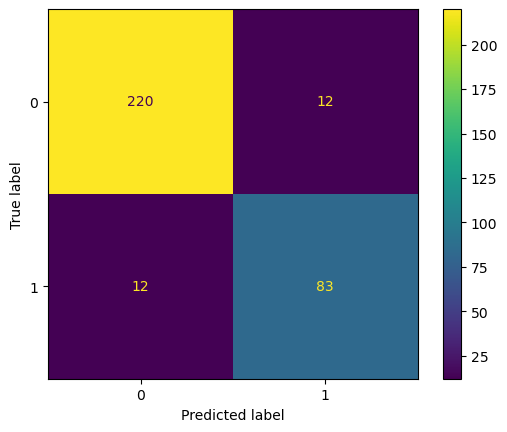

In [46]:
pred00log_split = r00_log.predict(X_test1)
pred00log_split = list(map(round,pred00log_split))
print(accuracy_score(y_test1, pred00log_split))
print('\nTest accuracy : \n', accuracy_score(y_test1, pred00log_split))
cm00log_split = confusion_matrix(y_test1, pred00log_split) 
print ('\nConfusion Matrix : \n', cm00log_split)
cm00log_split_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm00log_split)
cm00log_split_display.plot()

acc_log_split = metrics.accuracy_score(y_test1, pred00log_split)
print('accuracy', acc_log_split)

pre_log_split = metrics.precision_score(y_test1, pred00log_split, average = None)
print('precision', pre_log_split)

senrec_log_split = metrics.recall_score(y_test1, pred00log_split, average = None)
print('sensitivity recall', senrec_log_split)

f1_log_split = metrics.f1_score(y_test1, pred00log_split, average = None)
print('f1 score', f1_log_split)

pre_log_split_m = np.mean(pre_log_split)
senrec_log_split_m = np.mean(senrec_log_split)
f1_log_split_m = np.mean(f1_log_split)
print('mean precision', pre_log_split_m)
print('mean recall', senrec_log_split_m)
print('mean f1 score', f1_log_split_m)

# Step wise feature selection

In [3]:
# Check sklearn metrics name for feature selection
# sklearn.metrics.get_scorer_names()

## Ordinary Least Squares Regression model

### Sequential forward floating selection

In [118]:
# Find the best size

# Scoring = neg_mean_squared_error
# sfs = SequentialFeatureSelector(linear_model.LinearRegression(),
#                                 k_features='best',
#                                 forward=True,
#                                 floating=True,
#                                 verbose = 2,
#                                 scoring='neg_mean_squared_error',
#                                 cv=25,
#                                 n_jobs = -1
#                                )
# selected_features8 = sfs.fit(x, y)

# Scoring = r2
# sfs = SequentialFeatureSelector(linear_model.LinearRegression(),
#                                 k_features='best',
#                                 forward=True,
#                                 floating=True,
#                                 verbose = 1,
#                                 scoring='r2',
#                                 cv=20,
#                                 n_jobs = -1
#                                )
# selected_features10 = sfs.fit(x, y)

# # # Scoring = median absolute error
# sfs = SequentialFeatureSelector(linear_model.LinearRegression(),
#                                 k_features='best',
#                                 forward=True,
#                                 floating=True,
#                                 verbose = 1,
#                                 scoring='neg_median_absolute_error',
#                                 cv=20,
#                                 n_jobs = -1
#                                )
# selected_features13 = sfs.fit(x, y)

# # Scoring = mean absolute error
# sfs = SequentialFeatureSelector(linear_model.LinearRegression(),
#                                 k_features='best',
#                                 forward=True,
#                                 floating=True,
#                                 verbose = 1,
#                                 scoring='neg_mean_absolute_error',
#                                 cv=20,
#                                 n_jobs = -1
#                                )
# selected_features16 = sfs.fit(x, y)


In [112]:
# # n = best, linear regression, scoring = neg_mean_squared_error, cv = 5
sffslin0 = featureselection_lin(True, 'neg_mean_squared_error', 5, x, y) 
print(sffslin0.k_feature_names_)
print(len(sffslin0.k_feature_names_))
print(sffslin0.k_score_)


('dtrafficarea', 'droad', 'z_qnr_10', 'z_qnr_30', 'z_qnr_31', 'z_knr_8', 'trafficarea_2', 'r_width_4', 'r_width_5', 'r_width_6', 'r_surface_1', 'speedlimit_3', 'speedlimit_4', 'speedlimit_5')
14
-0.1468143631396745


In [113]:
# # n = best, linear regression, scoring = neg_mean_squared_error, cv = 10
sffslin1 = featureselection_lin(True, 'neg_mean_squared_error', 10, x, y) 
print(sffslin1.k_feature_names_)
print(len(sffslin1.k_feature_names_))
print(sffslin1.k_score_)


('dvfpath', 'r_width_value', 'z_qnr_10', 'z_qnr_23', 'z_qnr_26', 'z_knr_4', 'z_knr_9', 'trafficarea_2', 'r_width_1', 'r_width_2', 'r_width_3', 'r_width_4', 'r_width_5', 'r_width_6', 'r_surface_1', 'speedlimit_1', 'speedlimit_3', 'speedlimit_4', 'speedlimit_5')
19
-0.12106485422671336


In [114]:
# # # n = best, linear regression, scoring = neg_mean_squared_error, cv = 15
# print(selected_features6.k_feature_names_)
# print(len(selected_features6.k_feature_names_))
# print(selected_features6.k_score_)
# # 34

In [115]:
# # # n = best, linear regression, scoring = neg_mean_squared_error, cv = 20
# print(selected_features7.k_feature_names_)
# print(len(selected_features7.k_feature_names_))
# print(selected_features7.k_score_)
# 37

In [117]:
# # n = best, linear regression, scoring = r2, cv = 5
sffslin2 = featureselection_lin(True, 'r2', 5, x, y) 
print(sffslin2.k_feature_names_)
print(len(sffslin2.k_feature_names_))
print(sffslin2.k_score_)

('ie', 'mew', 'cmin', 'dstopsign', 'dvfpath', 'r_width_value', 'speedlimit_value', 'z_qnr_3', 'z_qnr_10', 'z_qnr_11', 'z_qnr_13', 'z_qnr_14', 'z_qnr_23', 'z_knr_5', 'z_knr_6', 'z_knr_7', 'z_knr_9', 'r_width_1', 'r_width_3', 'r_width_4', 'r_width_5', 'r_width_6', 'r_surface_1', 'speedlimit_1', 'speedlimit_4')
25
0.09083514182795516


In [131]:
# n = best, linear regression, scoring = r2, cv = 10
sffslin3 = featureselection_lin(True, 'r2', 10, x, y) 
print(sffslin3.k_feature_names_)
print(len(sffslin3.k_feature_names_))
print(sffslin3.k_score_)

('cp', 'ie', 'mew', 'megmax', 'dparktw', 'dpedcro', 'dstopsign', 'droad', 'r_width_value', 'speedlimit_value', 'z_qnr_2', 'z_qnr_3', 'z_qnr_4', 'z_qnr_6', 'z_qnr_9', 'z_qnr_10', 'z_qnr_12', 'z_qnr_13', 'z_qnr_14', 'z_qnr_15', 'z_qnr_16', 'z_qnr_18', 'z_qnr_23', 'z_qnr_25', 'z_qnr_27', 'z_qnr_30', 'z_qnr_31', 'z_qnr_32', 'z_knr_1', 'z_knr_2', 'z_knr_6', 'z_knr_7', 'z_knr_8', 'z_knr_11', 'r_width_1', 'r_width_3', 'r_width_4', 'r_width_5', 'r_width_6', 'r_surface_1', 'speedlimit_1', 'speedlimit_4', 'speedlimit_5')
43
-0.003116770937851121


In [118]:
# # # n = best, linear regression, scoring = r2, cv = 15
# print(selected_features9.k_feature_names_)
# print(len(selected_features9.k_feature_names_))
# print(selected_features9.k_score_)
# # 59

In [119]:
# # # n = best, linear regression, scoring = r2, cv = 20
# print(selected_features10.k_feature_names_)
# print(len(selected_features10.k_feature_names_))
# print(selected_features10.k_score_)
# # 73

In [120]:
# # # n = best, linear regression, scoring = neg median absolute error, cv = 5
sffslin4 = featureselection_lin(True, 'neg_median_absolute_error', 5, x, y) 
print(sffslin4.k_feature_names_)
print(len(sffslin4.k_feature_names_))
print(sffslin4.k_score_)

('z_qnr_7', 'trafficarea_2', 'r_width_4', 'speedlimit_1', 'speedlimit_4')
5
-0.18490933143765312


In [133]:
# # # n = best, linear regression, scoring = neg median absolute error, cv = 10
sffslin5 = featureselection_lin(True, 'neg_median_absolute_error', 10, x, y) 
print(sffslin5.k_feature_names_)
print(len(sffslin5.k_feature_names_))
print(sffslin5.k_score_)

('r_width_value', 'speedlimit_value', 'z_qnr_20', 'z_qnr_22', 'z_qnr_26', 'trafficarea_2', 'r_width_3', 'r_width_4', 'r_width_5', 'r_width_6', 'r_surface_1', 'speedlimit_4')
12
-0.13157577362107836


In [121]:
# # # n = best, linear regression, scoring = neg median absolute error, cv = 15
# print(selected_features12.k_feature_names_)
# print(len(selected_features12.k_feature_names_))
# print(selected_features12.k_score_)
# 21

In [122]:
# # n = best, linear regression, scoring = neg median absolute error, cv = 20
# print(selected_features13.k_feature_names_)
# print(len(selected_features13.k_feature_names_))
# print(selected_features13.k_score_)
# # 11

In [125]:
# # # n = best, linear regression, scoring = neg mean absolute error, cv = 5
sffslin6 = featureselection_lin(True, 'neg_mean_absolute_error', 5, x, y) 
print(sffslin6.k_feature_names_)
print(len(sffslin6.k_feature_names_))
print(sffslin6.k_score_)

('dtrafficarea', 'z_qnr_10', 'trafficarea_2', 'r_width_4', 'r_width_5', 'r_surface_1', 'speedlimit_1', 'speedlimit_3', 'speedlimit_4', 'speedlimit_5')
10
-0.28187575192075237


In [124]:
# # # n = best, linear regression, scoring = neg mean absolute error, cv = 10
sffslin7 = featureselection_lin(True, 'neg_mean_absolute_error', 10, x, y) 
print(sffslin7.k_feature_names_)
print(len(sffslin7.k_feature_names_))
print(sffslin7.k_score_)

('dplight', 'r_width_value', 'speedlimit_value', 'z_qnr_23', 'z_qnr_26', 'z_knr_4', 'z_knr_9', 'trafficarea_2', 'r_width_3', 'r_width_4', 'r_width_5', 'r_width_6', 'r_surface_1', 'speedlimit_4')
14
-0.2420524177831998


In [126]:
# # n = best, linear regression, scoring = neg mean absolute error, cv = 15
# print(selected_features15.k_feature_names_)
# print(len(selected_features15.k_feature_names_))
# print(selected_features15.k_score_)
# # 24

In [127]:
# # # n = best, linear regression, scoring = neg mean absolute error, cv = 20
# print(selected_features16.k_feature_names_)
# print(len(selected_features16.k_feature_names_))
# print(selected_features16.k_score_)
# # 22

In [135]:
selected_columns_linr_sffs = []
selected_columns_linr_sffs = {'nmse_cv5':list(sffslin0.k_feature_names_), 
                              'nmse_cv10':list(sffslin1.k_feature_names_), 
                              'r2_cv5':list(sffslin2.k_feature_names_), 
                              'r2_cv10':list(sffslin3.k_feature_names_), 
                              'nmedae_cv5':list(sffslin4.k_feature_names_), 
                              'nmedae_cv10':list(sffslin5.k_feature_names_), 
                              'nmeae_cv5':list(sffslin6.k_feature_names_), 
                              'nmeae_cv10':list(sffslin7.k_feature_names_)}

In [136]:
df_sf_linr_sffs = pd.DataFrame(dict([(k,pd.Series(v)) for k,v in selected_columns_linr_sffs.items()]))

In [137]:
df_sf_linr_sffs.to_csv('/home/yelhe/script/mtp/tables/updated_sffs_linearreg.csv', index = True)

In [152]:
# selected_columns = list(sffslin.k_feature_names_)


In [257]:
# # OLS
# df_selected = dfacrpv[selected_columns]

# m0 = sm.OLS(y, df_selected)
# r0 = m0.fit()
# r0.summary()

### Sequential backward floating selection

In [154]:
# # n = best, linear regression, backward, scoring = neg_mean_squared_error, cv = 5
sbfslin0 = featureselection_lin(False, 'neg_mean_squared_error', 5, x, y) 
print(sbfslin0.k_feature_names_)
print(len(sbfslin0.k_feature_names_))
print(sbfslin0.k_score_)

('dtrafficarea', 'droad', 'z_qnr_10', 'z_qnr_30', 'z_qnr_31', 'z_knr_8', 'trafficarea_2', 'r_width_4', 'r_width_5', 'r_width_6', 'r_surface_1', 'speedlimit_3', 'speedlimit_4', 'speedlimit_5')
14
-0.1468143631396745


In [155]:
# # n = best, linear regression, backward, scoring = neg_mean_squared_error, cv = 10
sbfslin1 = featureselection_lin(False, 'neg_mean_squared_error', 10, x, y) 
print(sbfslin1.k_feature_names_)
print(len(sbfslin1.k_feature_names_))
print(sbfslin1.k_score_)


('ie', 'dvfpath', 'r_width_value', 'speedlimit_value', 'z_qnr_10', 'z_qnr_23', 'z_qnr_25', 'z_qnr_26', 'z_knr_4', 'z_knr_9', 'trafficarea_2', 'r_width_1', 'r_width_2', 'r_width_3', 'r_width_4', 'r_width_5', 'r_width_6', 'r_surface_1', 'speedlimit_3', 'speedlimit_4')
20
-0.12100686105804259


In [156]:
# # n = best, linear regression, backward, scoring = neg_mean_squared_error, cv = 15
# print(sbfs2.k_feature_names_)
# print(len(sbfs2.k_feature_names_))
# print(sbfs2.k_score_)
# # 26

In [157]:
# # n = best, linear regression, backward, scoring = neg_mean_squared_error, cv = 20
# print(sbfs3.k_feature_names_)
# print(len(sbfs3.k_feature_names_))
# print(sbfs3.k_score_)
# # 52

In [158]:
# # n = best, linear regression, backward, scoring = r2, cv = 5
sbfslin2 = featureselection_lin(False, 'r2', 5, x, y) 
print(sbfslin2.k_feature_names_)
print(len(sbfslin2.k_feature_names_))
print(sbfslin2.k_score_)

('ie', 'mew', 'cmin', 'dstopsign', 'dvfpath', 'r_width_value', 'speedlimit_value', 'z_qnr_3', 'z_qnr_10', 'z_qnr_11', 'z_qnr_13', 'z_qnr_14', 'z_qnr_23', 'z_knr_5', 'z_knr_6', 'z_knr_7', 'z_knr_9', 'r_width_1', 'r_width_3', 'r_width_4', 'r_width_5', 'r_width_6', 'r_surface_1', 'speedlimit_1', 'speedlimit_4')
25
0.09083514182795516


In [159]:
# # n = best, linear regression, backward, scoring = r2, cv = 10
sbfslin3 = featureselection_lin(False, 'r2', 10, x, y) 
print(sbfslin3.k_feature_names_)
print(len(sbfslin3.k_feature_names_))
print(sbfslin3.k_score_)

('ie', 'mew', 'cmin', 'dstopsign', 'dvfpath', 'r_width_value', 'speedlimit_value', 'z_qnr_2', 'z_qnr_3', 'z_qnr_4', 'z_qnr_6', 'z_qnr_9', 'z_qnr_10', 'z_qnr_13', 'z_qnr_14', 'z_qnr_15', 'z_qnr_16', 'z_qnr_18', 'z_qnr_25', 'z_qnr_26', 'z_qnr_30', 'z_qnr_31', 'z_qnr_32', 'z_knr_1', 'z_knr_2', 'z_knr_5', 'z_knr_6', 'z_knr_7', 'z_knr_8', 'trafficarea_1', 'trafficarea_2', 'r_width_1', 'r_width_2', 'r_width_3', 'r_width_4', 'r_width_5', 'r_width_6', 'r_surface_1', 'speedlimit_3', 'speedlimit_4', 'speedlimit_5')
41
-0.0037091494395070645


In [162]:
# # n = best, linear regression, backward, scoring = r2, cv = 15


In [163]:
# # n = best, linear regression, backward, scoring = r2, cv = 20


In [165]:
# # n = best, linear regression, backward, scoring = neg median aboslute error, cv = 5
sbfslin4 = featureselection_lin(False, 'neg_median_absolute_error', 5, x, y) 
print(sbfslin4.k_feature_names_)
print(len(sbfslin4.k_feature_names_))
print(sbfslin4.k_score_)

('z_qnr_7', 'z_qnr_8', 'z_qnr_12', 'z_qnr_16', 'z_qnr_22', 'z_qnr_27', 'z_knr_4', 'z_knr_5', 'z_knr_9', 'trafficarea_2', 'r_width_4', 'r_width_6', 'speedlimit_4')
13
-0.1534518932857683


In [166]:
# # n = best, linear regression, backward, scoring = neg median aboslute error, cv = 10
sbfslin5 = featureselection_lin(False, 'neg_median_absolute_error', 10, x, y) 
print(sbfslin5.k_feature_names_)
print(len(sbfslin5.k_feature_names_))
print(sbfslin5.k_score_)

('r_width_value', 'speedlimit_value', 'z_qnr_20', 'z_qnr_22', 'z_qnr_26', 'trafficarea_2', 'r_width_3', 'r_width_4', 'r_width_5', 'r_width_6', 'r_surface_1', 'speedlimit_4')
12
-0.13157577362107836


In [252]:
# # n = best, linear regression, backward, scoring = neg median aboslute error, cv = 15


('z_qnr_1', 'z_qnr_5', 'z_qnr_7', 'z_qnr_16', 'z_qnr_20', 'z_qnr_26', 'z_qnr_28', 'z_qnr_29', 'z_knr_9', 'trafficarea_3', 'r_width_4', 'speedlimit_2', 'speedlimit_4', 'speedlimit_6')
14
-0.14787659233510794


In [254]:
# # n = best, linear regression, backward, scoring = neg median aboslute error, cv = 20


('z_knr_12', 'trafficarea_1', 'trafficarea_2', 'trafficarea_3', 'r_width_4', 'r_width_6', 'speedlimit_2', 'speedlimit_4', 'speedlimit_6')
9
-0.12273976660347483


In [167]:
# # n = best, linear regression, backward, scoring = neg mean absolute error, cv = 5
sbfslin6 = featureselection_lin(False, 'neg_mean_absolute_error', 5, x, y) 
print(sbfslin6.k_feature_names_)
print(len(sbfslin6.k_feature_names_))
print(sbfslin6.k_score_)

('dtrafficarea', 'z_qnr_10', 'trafficarea_2', 'r_width_4', 'r_width_5', 'r_surface_1', 'speedlimit_1', 'speedlimit_3', 'speedlimit_4', 'speedlimit_5')
10
-0.28187575192075237


In [168]:
# # n = best, linear regression, backward, scoring = neg mean aboslute error, cv = 10
sbfslin7 = featureselection_lin(False, 'neg_mean_absolute_error', 10, x, y) 
print(sbfslin7.k_feature_names_)
print(len(sbfslin7.k_feature_names_))
print(sbfslin7.k_score_)

('dplight', 'r_width_value', 'speedlimit_value', 'z_qnr_23', 'z_qnr_26', 'z_knr_4', 'z_knr_9', 'trafficarea_2', 'r_width_3', 'r_width_4', 'r_width_5', 'r_width_6', 'r_surface_1', 'speedlimit_4')
14
-0.2420524177831998


In [169]:
# # n = best, linear regression, backward, scoring = neg mean aboslute error, cv = 15


In [170]:
# n = best, linear regression, backward, scoring = neg mean aboslute error, cv = 20


In [171]:
selected_columns_linr_sbfs = []
selected_columns_linr_sbfs = {'all': cnu,
                              'nmse_cv5':list(sbfslin0.k_feature_names_), 
                              'nmse_cv10':list(sbfslin1.k_feature_names_), 
                              'r2_cv5':list(sbfslin2.k_feature_names_), 
                              'r2_cv10':list(sbfslin3.k_feature_names_), 
                              'nmedae_cv5':list(sbfslin4.k_feature_names_), 
                              'nmedae_cv10':list(sbfslin5.k_feature_names_),
                              'nmeae_cv5':list(sbfslin6.k_feature_names_), 
                              'nmeae_cv10':list(sbfslin7.k_feature_names_)}

In [172]:
df_sf_linr_sbfs = pd.DataFrame(dict([(k,pd.Series(v)) for k,v in selected_columns_linr_sbfs.items()]))

In [173]:
df_sf_linr_sbfs.to_csv('/home/yelhe/script/mtp/tables/updated_sbfs_linearreg.csv', index = True)

In [188]:
sbfs_columns = list(sbfslin7.k_feature_names_)

In [100]:
# df_output = pd.read_csv('/home/yelhe/script/mtp/tables/updated_sbfs_linearreg.csv')

In [101]:
# df_output.columns

Index(['Unnamed: 0', 'all', 'nmse_cv5', 'nmse_cv10', 'r2_cv5', 'r2_cv10',
       'nmedae_cv5', 'nmedae_cv10', 'nmeae_cv5', 'nmeae_cv10'],
      dtype='object')

In [102]:
# prsq_lin_sffs = []
# prsq_lin_sbfs = []

In [131]:


# ## For sffs
# l = list(df_output['nmeae_cv10'].dropna())

# # x_selected
# xs = dfacrpv[l]

In [132]:
# # OLS
# xs_const = tools.add_constant(xs) 
# # X_train, X_test, y_train, y_test = train_test_split(
# #         df_selected, y,
# #         test_size=0.3,
# #         random_state=0)

# m1 = sm.OLS(y, xs_const)
# r1 = m1.fit()
# r1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    acp   R-squared:                       0.510
Model:                            OLS   Adj. R-squared:                  0.503
Method:                 Least Squares   F-statistic:                     79.61
Date:                Fri, 04 Oct 2024   Prob (F-statistic):          7.28e-155
Time:                        18:37:30   Log-Likelihood:                -274.08
No. Observations:                1087   AIC:                             578.2
Df Residuals:                    1072   BIC:                             653.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.3365      0.070     -4.815      0.000      -0.474      -0.199
dplight              0.0138      0.010      1.390      0.165      -0.006       0.033
r_width_value       -0.0917      0.019     -4.732      0.000      -0.130      -0.054
speedlimit_value    -0.0821      0.011     -7.253      0.000      -0.104      -0.060
z_qnr_23            -0.2385      0.070     -3.388      0.001      -0.377      -0.100
z_qnr_26            -0.2785      0.098     -2.841      0.005      -0.471      -0.086
z_knr_4              0.2378      0.034      6.982      0.000       0.171       0.305
z_knr_9              0.2139      0.033      6.388      0.000       0.148       0.280
trafficarea_2       -0.2257      0.038     -5.913      0.000      -0.301      -0.151
r_width_3            0.1765      0.047      3.741      0.000       0.084       0.269
r_width_4            0.1781      0.035      5.041      0.000       0.109       0.247
r_width_5            0.2076      0.037      5.652      0.000       0.136       0.280
r_width_6            0.1797      0.043      4.192      0.000       0.096       0.264
r_surface_1          0.3681      0.065      5.667      0.000       0.241       0.495
speedlimit_4         0.7182      0.028     25.208      0.000       0.662       0.774
==============================================================================
Omnibus:                      162.499   Durbin-Watson:                   0.834
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              293.176
Skew:                           0.926   Prob(JB):                     2.18e-64
Kurtosis:                       4.744   Cond. No.                         15.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [133]:
# prsq_lin_sbfs.append(r1.rsquared_adj)

In [134]:
prsq_lin_sbfs

[0.46863270188062633,
 0.5228831125625122,
 0.5083388939077372,
 0.539473692009008,
 0.4665037273438992,
 0.47415516300643146,
 0.46239446930329153,
 0.5033154652889078]

In [96]:
prsq_lin_sffs

[0.46863270188062633,
 0.5170176533771211,
 0.5083388939077372,
 0.5299324651839028,
 0.42039652784715786,
 0.47415516300643146,
 0.46239446930329153,
 0.5033154652889078]

## Logistic Regression model

### Sequential forward floating selection

In [190]:
# # n = best, logistic regression, scoring = accuracy, cv = 5
sffslog0 = featureselection_log(True, 'accuracy', 5, x, y)
print(sffslog0.k_feature_names_)
print(len(sffslog0.k_feature_names_))
print(sffslog0.k_score_)


('cp', 'ie', 'mew', 'megmax', 'cmin', 'dbusl', 'dplight', 'dstation', 'dparkcar', 'dtrafficarea', 'droad', 'dvfpath', 'gvm_dwv', 'carcount', 'z_qnr_1', 'z_qnr_2', 'z_qnr_3', 'z_qnr_4', 'z_qnr_5', 'z_qnr_6', 'z_qnr_8', 'z_qnr_11', 'z_qnr_12', 'z_qnr_16', 'z_qnr_22', 'z_qnr_23', 'z_qnr_24', 'z_qnr_25', 'z_qnr_26', 'z_qnr_28', 'z_qnr_29', 'z_qnr_30', 'z_qnr_31', 'z_knr_1', 'z_knr_2', 'z_knr_3', 'z_knr_4', 'z_knr_6', 'z_knr_9', 'z_knr_11', 'trafficarea_2', 'r_width_1', 'r_width_3', 'r_width_4', 'r_width_5', 'r_width_6', 'r_surface_1', 'speedlimit_1', 'speedlimit_3', 'speedlimit_4')
50
0.873939880776223


In [197]:
# n = best, logistic regression, scoring = accuracy, cv = 10
sffslog1 = featureselection_log(True, 'accuracy', 10, x, y)
print(sffslog1.k_feature_names_)
print(len(sffslog1.k_feature_names_))
print(sffslog1.k_score_)


('cp', 'ie', 'mew', 'meg', 'dbusl', 'dtraml', 'dplight', 'dstation', 'dparktw', 'dpedcro', 'dstopsign', 'dtrafficarea', 'droad', 'dvfpath', 'gvm_dwv', 'carcount', 'r_width_value', 'z_qnr_1', 'z_qnr_2', 'z_qnr_3', 'z_qnr_7', 'z_qnr_9', 'z_qnr_14', 'z_qnr_15', 'z_qnr_16', 'z_qnr_17', 'z_qnr_22', 'z_qnr_24', 'z_qnr_25', 'z_qnr_26', 'z_qnr_28', 'z_qnr_29', 'z_qnr_30', 'z_qnr_31', 'z_knr_2', 'z_knr_3', 'z_knr_4', 'z_knr_6', 'z_knr_9', 'z_knr_10', 'z_knr_11', 'trafficarea_2', 'r_width_1', 'r_width_2', 'r_width_3', 'r_width_4', 'r_width_5', 'r_width_6', 'r_surface_1', 'speedlimit_4', 'speedlimit_5')
51
0.8729442745497792


In [191]:
# # # n = best, logistic regression, scoring = accuracy, cv = 15
# sffslog2 = featureselection_log(True, 'accuracy', 15, x, y)
# print(sffslog2.k_feature_names_)
# print(len(sffslog2.k_feature_names_))
# print(sffslog2.k_score_)

In [192]:
# # # n = best, logistic regression, scoring = accuracy, cv = 20
# sffslog3 = featureselection_log(True, 'accuracy', 20, x, y)
# print(sffslog3.k_feature_names_)
# print(len(sffslog3.k_feature_names_))
# print(sffslog3.k_score_)
# #

In [199]:
# # n = best, logistic regression, scoring = f1, cv = 5
sffslog2 = featureselection_log(True, 'f1', 5, x, y)
print(sffslog2.k_feature_names_)
print(len(sffslog2.k_feature_names_))
print(sffslog2.k_score_)


('cp', 'ie', 'mew', 'meg', 'megmax', 'cmin', 'dbusl', 'dtraml', 'dplight', 'dstation', 'dparkcar', 'dpedcro', 'dtrafficarea', 'droad', 'dvfpath', 'bicyclecount', 'carcount', 'z_qnr_1', 'z_qnr_3', 'z_qnr_4', 'z_qnr_5', 'z_qnr_6', 'z_qnr_7', 'z_qnr_8', 'z_qnr_11', 'z_qnr_12', 'z_qnr_13', 'z_qnr_14', 'z_qnr_17', 'z_qnr_22', 'z_qnr_23', 'z_qnr_26', 'z_qnr_27', 'z_qnr_28', 'z_qnr_30', 'z_qnr_31', 'z_knr_1', 'z_knr_3', 'z_knr_4', 'z_knr_6', 'z_knr_9', 'z_knr_10', 'trafficarea_2', 'r_width_2', 'r_width_3', 'r_width_4', 'r_width_5', 'r_width_6', 'r_surface_1', 'speedlimit_1', 'speedlimit_3', 'speedlimit_4', 'speedlimit_5')
53
0.7288283828382839


In [200]:
# # n = best, logistic regression, scoring = f1, cv = 10
sffslog3 = featureselection_log(True, 'f1', 10, x, y)
print(sffslog3.k_feature_names_)
print(len(sffslog3.k_feature_names_))
print(sffslog3.k_score_)


('cp', 'ie', 'mew', 'meg', 'dbusl', 'dtraml', 'dplight', 'dstation', 'dparkcar', 'dpedcro', 'dstopsign', 'dtrafficarea', 'droad', 'dvfpath', 'gvm_dwv', 'carcount', 'r_width_value', 'speedlimit_value', 'z_qnr_2', 'z_qnr_7', 'z_qnr_8', 'z_qnr_10', 'z_qnr_12', 'z_qnr_14', 'z_qnr_15', 'z_qnr_16', 'z_qnr_17', 'z_qnr_23', 'z_qnr_24', 'z_qnr_25', 'z_qnr_26', 'z_qnr_29', 'z_qnr_30', 'z_qnr_31', 'z_knr_2', 'z_knr_3', 'z_knr_4', 'z_knr_5', 'z_knr_9', 'z_knr_10', 'trafficarea_2', 'r_width_1', 'r_width_2', 'r_width_3', 'r_width_4', 'r_width_5', 'r_width_6', 'r_surface_1', 'speedlimit_4', 'speedlimit_5')
50
0.7291735787907159


In [193]:
# # # n = best, logistic regression, scoring = f1, cv = 15
# sffslog6 = featureselection_log(True, 'f1', 15, x, y)
# print(sffslog6.k_feature_names_)
# print(len(sffslog6.k_feature_names_))
# print(sffslog6.k_score_)
# #

In [194]:
# # # n = best, logistic regression, scoring = f1, cv = 20
# sffslog7 = featureselection_log(True, 'f1', 20, x, y)
# print(sffslog7.k_feature_names_)
# print(len(sffslog7.k_feature_names_))
# print(sffslog7.k_score_)
# #

In [256]:
# # n = best, logistic regression, scoring = precision, cv = 5
# sffslog4 = featureselection_log(True, 'precision', 5, x, y)
# print(sffslog4.k_feature_names_)
# print(len(sffslog4.k_feature_names_))
# print(sffslog4.k_score_)
# ('cp', 'ie', 'mew', 'meg', 'cmin', 'dtraml', 'dstation', 'dpedcro', 'dtrafficarea', 'dvfpath', 'z_qnr_2', 'z_qnr_4', 'z_qnr_5', 'z_qnr_6', 'z_qnr_8', 'z_qnr_15', 'z_qnr_16', 'z_qnr_20', 'z_qnr_22', 'z_qnr_23', 'z_qnr_26', 'z_qnr_28', 'z_qnr_29', 'z_qnr_30', 'z_qnr_31', 'z_qnr_32', 'z_knr_1', 'z_knr_10', 'trafficarea_2', 'r_width_1', 'r_width_2', 'r_width_3', 'r_width_4', 'r_width_5', 'r_width_6', 'r_surface_1', 'speedlimit_1', 'speedlimit_4')
# 38
# 0.9110282997075452

In [254]:
# # # n = best, logistic regression, scoring = precision, cv = 10
# sffslog5 = featureselection_log(True, 'precision', 10, x, y)
# print(sffslog5.k_feature_names_)
# print(len(sffslog5.k_feature_names_))
# print(sffslog5.k_score_)
# ('ie', 'meg', 'megmax', 'cmin', 'dbusl', 'dtraml', 'dplight', 'dstation', 'dparkcar', 'dparktw', 'dpedcro', 'dstopsign', 'dtrafficarea', 'droad', 'dvfpath', 'gvm_dwv', 'carcount', 'z_qnr_3', 'z_qnr_4', 'z_qnr_5', 'z_qnr_6', 'z_qnr_7', 'z_qnr_8', 'z_qnr_9', 'z_qnr_11', 'z_qnr_12', 'z_qnr_13', 'z_qnr_14', 'z_qnr_15', 'z_qnr_20', 'z_qnr_23', 'z_qnr_24', 'z_qnr_25', 'z_qnr_26', 'z_qnr_27', 'z_qnr_28', 'z_qnr_29', 'z_qnr_30', 'z_qnr_31', 'z_qnr_32', 'z_knr_2', 'z_knr_3', 'z_knr_10', 'z_knr_11', 'trafficarea_2', 'r_width_1', 'r_width_2', 'r_width_3', 'r_width_5', 'r_width_6', 'r_surface_1', 'speedlimit_1', 'speedlimit_4', 'speedlimit_5')
# 54
# 0.8929089390142021

In [203]:
# # # n = best, logistic regression, scoring = precision, cv = 15
# sffslog10 = featureselection_log(True, 'precision', 15, x, y)
# print(sffslog10.k_feature_names_)
# print(len(sffslog10.k_feature_names_))
# print(sffslog10.k_score_)

In [204]:
# # # n = best, logistic regression, scoring = precision, cv = 20
# sffslog11 = featureselection_log(True, 'precision', 20, x, y)
# print(sffslog11.k_feature_names_)
# print(len(sffslog11.k_feature_names_))
# print(sffslog11.k_score_)


In [205]:
# # n = best, logistic regression, scoring = recall, cv = 5
sffslog6 = featureselection_log(True, 'recall', 5, x, y)
print(sffslog6.k_feature_names_)
print(len(sffslog6.k_feature_names_))
print(sffslog6.k_score_)


('cp', 'ie', 'mew', 'meg', 'megmax', 'cmin', 'dtraml', 'dstation', 'dparktw', 'dpedcro', 'dtrafficarea', 'droad', 'dvfpath', 'bicyclecount', 'carcount', 'r_width_value', 'speedlimit_value', 'z_qnr_1', 'z_qnr_3', 'z_qnr_4', 'z_qnr_5', 'z_qnr_6', 'z_qnr_7', 'z_qnr_9', 'z_qnr_14', 'z_qnr_16', 'z_qnr_18', 'z_qnr_23', 'z_qnr_27', 'z_qnr_29', 'z_qnr_30', 'z_qnr_31', 'z_qnr_32', 'z_knr_1', 'z_knr_2', 'z_knr_4', 'z_knr_6', 'z_knr_8', 'z_knr_9', 'z_knr_10', 'r_width_3', 'r_width_5', 'r_width_6', 'r_surface_1', 'speedlimit_4', 'speedlimit_5')
46
0.6508474576271186


In [206]:
# # n = best, logistic regression, scoring = recall, cv = 10
sffslog7 = featureselection_log(True, 'recall', 10, x, y)
print(sffslog7.k_feature_names_)
print(len(sffslog7.k_feature_names_))
print(sffslog7.k_score_)


('cp', 'ie', 'mew', 'meg', 'megmax', 'cmin', 'dbusl', 'dtraml', 'dplight', 'dstation', 'dpedcro', 'droad', 'gvm_dwv', 'carcount', 'r_width_value', 'speedlimit_value', 'z_qnr_2', 'z_qnr_3', 'z_qnr_4', 'z_qnr_6', 'z_qnr_7', 'z_qnr_9', 'z_qnr_13', 'z_qnr_15', 'z_qnr_16', 'z_qnr_18', 'z_qnr_20', 'z_qnr_23', 'z_qnr_24', 'z_qnr_27', 'z_qnr_29', 'z_qnr_30', 'z_qnr_31', 'z_qnr_32', 'z_knr_4', 'z_knr_7', 'z_knr_9', 'trafficarea_1', 'r_width_3', 'r_surface_1', 'speedlimit_1', 'speedlimit_4', 'speedlimit_5')
43
0.6668965517241379


In [207]:
# # # n = best, logistic regression, scoring = recall, cv = 15
# sffslog14 = featureselection_log(True, 'recall', 15, x, y)
# print(sffslog14.k_feature_names_)
# print(len(sffslog14.k_feature_names_))
# print(sffslog14.k_score_)
# #

In [208]:
# # # n = best, logistic regression, scoring = recall, cv = 20
# sffslog15 = featureselection_log(True, 'recall', 20, x, y)
# print(sffslog15.k_feature_names_)
# print(len(sffslog15.k_feature_names_))
# print(sffslog15.k_score_)
# #

In [209]:
# For part 
selected_columns_logr_sffs = []
selected_columns_logr_sffs = {'all': cnu,
                              'acc_cv5':list(sffslog0.k_feature_names_), 
                              'acc_cv10':list(sffslog1.k_feature_names_), 
                              'f1_cv5':list(sffslog2.k_feature_names_), 
                              'f1_cv10':list(sffslog3.k_feature_names_), 
                              'pre_cv5':list(sffslog4.k_feature_names_), 
                              'pre_cv10':list(sffslog5.k_feature_names_),
                              'rec_cv5':list(sffslog6.k_feature_names_), 
                              'rec_cv10':list(sffslog7.k_feature_names_)
                              }
df_sf_logr_sffs = pd.DataFrame(dict([(k,pd.Series(v)) for k,v in selected_columns_logr_sffs.items()]))
df_sf_logr_sffs.to_csv('/home/yelhe/script/mtp/tables/updated_sffs_logisticreg.csv', index = True)

### Sequential backward floating selection

In [210]:
# n = best, logistic regression, scoring = accuracy, cv = 5
sbfslog0 = featureselection_log(False, 'accuracy', 5, x, y)
print(sbfslog0.k_feature_names_)
print(len(sbfslog0.k_feature_names_))
print(sbfslog0.k_score_)


('cp', 'ie', 'mew', 'dbusl', 'dtraml', 'dvfpath', 'speedlimit_value', 'z_qnr_2', 'z_qnr_5', 'z_qnr_7', 'z_qnr_8', 'z_qnr_11', 'z_qnr_23', 'z_qnr_26', 'z_knr_4', 'z_knr_9', 'trafficarea_2', 'r_width_4', 'r_width_5', 'r_width_6', 'r_surface_1', 'speedlimit_3', 'speedlimit_4')
23
0.8776096055468651


In [211]:
# n = best, logistic regression, scoring = accuracy, cv = 10
sbfslog1 = featureselection_log(False, 'accuracy', 10, x, y)
print(sbfslog1.k_feature_names_)
print(len(sbfslog1.k_feature_names_))
print(sbfslog1.k_score_)


('speedlimit_value', 'z_qnr_10', 'z_qnr_23', 'z_qnr_26', 'z_qnr_28', 'z_knr_2', 'z_knr_4', 'z_knr_5', 'z_knr_9', 'trafficarea_2', 'r_width_4', 'r_width_5', 'r_width_6', 'r_surface_1', 'speedlimit_3', 'speedlimit_4')
16
0.876630988786952


In [212]:
# # n = best, logistic regression, scoring = accuracy, cv = 15
# sbfslog2 = featureselection_log(False, 'accuracy', 15, x, y)
# print(sbfslog2.k_feature_names_)
# print(len(sbfslog2.k_feature_names_))
# print(sbfslog2.k_score_)


In [213]:
# # n = best, logistic regression, scoring = accuracy, cv = 20
# sbfslog3 = featureselection_log(False, 'accuracy', 20, x, y)
# print(sbfslog3.k_feature_names_)
# print(len(sbfslog3.k_feature_names_))
# print(sbfslog3.k_score_)


In [214]:
# n = best, logistic regression, scoring = f1, cv = 5
sbfslog2 = featureselection_log(False, 'f1', 5, x, y)
print(sbfslog2.k_feature_names_)
print(len(sbfslog2.k_feature_names_))
print(sbfslog2.k_score_)

('ie', 'mew', 'dpedcro', 'droad', 'dvfpath', 'bicyclecount', 'carcount', 'r_width_value', 'z_qnr_1', 'z_qnr_2', 'z_qnr_3', 'z_qnr_4', 'z_qnr_5', 'z_qnr_8', 'z_qnr_11', 'z_qnr_12', 'z_qnr_22', 'z_qnr_26', 'z_qnr_28', 'z_qnr_29', 'z_knr_1', 'z_knr_3', 'z_knr_4', 'z_knr_6', 'z_knr_9', 'trafficarea_2', 'r_width_1', 'r_width_3', 'r_width_4', 'r_width_5', 'r_width_6', 'r_surface_1', 'speedlimit_3', 'speedlimit_4')
34
0.7398528725487212


In [215]:
# n = best, logistic regression, scoring = f1, cv = 10
sbfslog3 = featureselection_log(False, 'f1', 10, x, y)
print(sbfslog3.k_feature_names_)
print(len(sbfslog3.k_feature_names_))
print(sbfslog3.k_score_)

('mew', 'meg', 'dbusl', 'dtraml', 'droad', 'dvfpath', 'gvm_dwv', 'r_width_value', 'z_qnr_7', 'z_qnr_16', 'z_qnr_26', 'z_qnr_28', 'z_knr_4', 'z_knr_9', 'trafficarea_2', 'r_width_1', 'r_width_2', 'r_surface_1', 'speedlimit_3', 'speedlimit_4')
20
0.7302000647209836


In [216]:
# # n = best, logistic regression, scoring = f1, cv = 15
# sbfslog6 = featureselection_log(False, 'f1', 15, x, y)
# print(sbfslog6.k_feature_names_)
# print(len(sbfslog6.k_feature_names_))
# print(sbfslog6.k_score_)

In [217]:
# n = best, logistic regression, scoring = f1, cv = 20
# sbfslog7 = featureselection_log(False, 'f1', 20, x, y)
# print(sbfslog7.k_feature_names_)
# print(len(sbfslog7.k_feature_names_))
# print(sbfslog7.k_score_)

In [252]:
# # n = best, logistic regression, scoring = precision, cv = 5
# sbfslog4 = featureselection_log(False, 'precision', 5, x, y)
# print(sbfslog4.k_feature_names_)
# print(len(sbfslog4.k_feature_names_))
# print(sbfslog4.k_score_)
# ('cp', 'mew', 'dbusl', 'dtraml', 'dvfpath', 'carcount', 'z_qnr_1', 'z_qnr_5', 'z_qnr_7', 'z_qnr_8', 'z_qnr_11', 'z_qnr_12', 'z_qnr_14', 'z_qnr_15', 'z_qnr_22', 'z_knr_4', 'z_knr_6', 'z_knr_9', 'z_knr_10', 'trafficarea_2', 'r_width_2', 'r_width_4', 'r_width_5', 'r_surface_1', 'speedlimit_3', 'speedlimit_4')
# 26
# 0.9248882098293862

In [253]:
# # n = best, logistic regression, scoring = precision, cv = 10
# sbfslog5 = featureselection_log(False, 'precision', 10, x, y)
# print(sbfslog5.k_feature_names_)
# print(len(sbfslog5.k_feature_names_))
# print(sbfslog5.k_score_)
# ('ie', 'meg', 'dtraml', 'dplight', 'dstopsign', 'droad', 'dvfpath', 'z_qnr_4', 'z_qnr_5', 'z_qnr_7', 'z_qnr_10', 'z_qnr_11', 'z_qnr_17', 'z_qnr_22', 'z_qnr_25', 'z_qnr_26', 'z_knr_3', 'z_knr_4', 'z_knr_5', 'z_knr_6', 'z_knr_9', 'z_knr_10', 'trafficarea_2', 'r_width_2', 'r_width_4', 'r_width_5', 'r_surface_1', 'speedlimit_4')
# 28
# 0.9249112978524743

In [220]:
# # n = best, logistic regression, scoring = precision, cv = 15
# sbfslog10 = featureselection_log(False, 'precision', 15, x, y)
# print(sbfslog10.k_feature_names_)
# print(len(sbfslog10.k_feature_names_))
# print(sbfslog10.k_score_)

In [221]:
# # n = best, logistic regression, scoring = precision, cv = 20
# sbfslog11 = featureselection_log(False, 'precision', 20, x, y)
# print(sbfslog11.k_feature_names_)
# print(len(sbfslog11.k_feature_names_))
# print(sbfslog11.k_score_)

In [222]:
# n = best, logistic regression, scoring = recall, cv = 5
sbfslog6 = featureselection_log(False, 'recall', 5, x, y)
print(sbfslog6.k_feature_names_)
print(len(sbfslog6.k_feature_names_))
print(sbfslog6.k_score_)

('ie', 'bicyclecount', 'r_width_value', 'speedlimit_value', 'z_qnr_3', 'z_qnr_8', 'z_qnr_10', 'z_qnr_11', 'z_qnr_13', 'z_qnr_23', 'z_knr_1', 'z_knr_2', 'z_knr_4', 'z_knr_6', 'z_knr_8', 'z_knr_11', 'trafficarea_2', 'r_width_2', 'r_width_4', 'r_width_5', 'r_width_6', 'r_surface_1', 'speedlimit_1', 'speedlimit_4')
24
0.6813559322033899


In [223]:
# n = best, logistic regression, scoring = recall, cv = 10
sbfslog7 = featureselection_log(False, 'recall', 10, x, y)
print(sbfslog7.k_feature_names_)
print(len(sbfslog7.k_feature_names_))
print(sbfslog7.k_score_)

('ie', 'mew', 'meg', 'dpedcro', 'droad', 'dvfpath', 'gvm_dwv', 'bicyclecount', 'r_width_value', 'speedlimit_value', 'z_qnr_3', 'z_qnr_7', 'z_qnr_10', 'z_qnr_11', 'z_qnr_16', 'z_qnr_18', 'z_qnr_23', 'z_qnr_26', 'z_qnr_31', 'z_qnr_32', 'z_knr_4', 'z_knr_5', 'z_knr_6', 'z_knr_8', 'z_knr_9', 'trafficarea_2', 'r_width_2', 'r_width_3', 'r_width_4', 'r_width_5', 'r_width_6', 'r_surface_1', 'speedlimit_1', 'speedlimit_4')
34
0.6880459770114944


In [224]:
# # n = best, logistic regression, scoring = recall, cv = 15
# sbfslog14 = featureselection_log(False, 'recall', 15, x, y)
# print(sbfslog14.k_feature_names_)
# print(len(sbfslog14.k_feature_names_))
# print(sbfslog14.k_score_)
# #

In [225]:
# # n = best, logistic regression, scoring = recall, cv = 20
# sbfslog15 = featureselection_log(False, 'recall', 20, x, y)
# print(sbfslog15.k_feature_names_)
# print(len(sbfslog15.k_feature_names_))
# print(sbfslog15.k_score_)
# #

In [226]:
# For all 
selected_columns_logr_sbfs = []
selected_columns_logr_sbfs = {'all': cnu,
                              'acc_cv5':list(sbfslog0.k_feature_names_), 
                              'acc_cv10':list(sbfslog1.k_feature_names_),
                              'f1_cv5':list(sbfslog2.k_feature_names_), 
                              'f1_cv10':list(sbfslog3.k_feature_names_),
                              'pre_cv5':list(sbfslog4.k_feature_names_), 
                              'pre_cv10':list(sbfslog5.k_feature_names_),
                              'rec_cv5':list(sbfslog6.k_feature_names_), 
                              'rec_cv10':list(sbfslog7.k_feature_names_)
                              }
df_sf_logr_sbfs = pd.DataFrame(dict([(k,pd.Series(v)) for k,v in selected_columns_logr_sbfs.items()]))
df_sf_logr_sbfs.to_csv('/home/yelhe/script/mtp/tables/updated_sbfs_logisticreg.csv', index = True)

In [176]:
df_output = pd.read_csv('/home/yelhe/script/mtp/tables/updated_sbfs_logisticreg.csv')

In [177]:
df_output.columns

Index(['Unnamed: 0', 'all', 'acc_cv5', 'acc_cv10', 'f1_cv5', 'f1_cv10',
       'pre_cv5', 'pre_cv10', 'rec_cv5', 'rec_cv10'],
      dtype='object')

In [175]:
# log_sffs = []
log_sbfs = []

In [206]:
l = list(df_output['rec_cv10'].dropna())

# x_selected
xs = dfacrpv[l]

In [207]:

# Add constant
xs_const = tools.add_constant(xs)
m_fslog = sm.Logit(y,xs_const, max_iter = 400)
r_fslog = m_fslog.fit_regularized()

r_fslog.summary()

/opt/conda/lib/python3.11/site-packages/statsmodels/base/model.py:130: ValueWarning: unknown kwargs ['max_iter']
  warnings.warn(msg, ValueWarning)
/opt/conda/lib/python3.11/site-packages/statsmodels/base/model.py:130: ValueWarning: unknown kwargs ['max_iter']
  warnings.warn(msg, ValueWarning)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.257084446422331
            Iterations: 258
            Function evaluations: 259
            Gradient evaluations: 258


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    acp   No. Observations:                 1087
Model:                          Logit   Df Residuals:                     1052
Method:                           MLE   Df Model:                           34
Date:                Fri, 04 Oct 2024   Pseudo R-squ.:                  0.5603
Time:                        18:48:28   Log-Likelihood:                -279.45
converged:                       True   LL-Null:                       -635.50
Covariance Type:            nonrobust   LLR p-value:                7.829e-128
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const              -30.9602   1.04e+05     -0.000      1.000   -2.03e+05    2.03e+05
ie                  -0.1533      0.113     -1.360      0.174      -0.374       0.068
mew                  0.2244      0.121      1.861      0.063      -0.012       0.461
meg                  0.0266      0.126      0.211      0.833      -0.220       0.273
dpedcro             -0.0291      0.124     -0.234      0.815      -0.273       0.215
droad               -0.1177      0.131     -0.901      0.368      -0.374       0.139
dvfpath             -0.2142      0.127     -1.683      0.092      -0.464       0.035
gvm_dwv              0.0040      0.125      0.032      0.974      -0.240       0.249
bicyclecount        -0.0808      0.119     -0.678      0.498      -0.314       0.153
r_width_value       -0.8783      0.202     -4.353      0.000      -1.274      -0.483
speedlimit_value    -1.2634      0.209     -6.054      0.000      -1.672      -0.854
z_qnr_3             -0.8016      0.807     -0.993      0.320      -2.383       0.780
z_qnr_7              2.3539      0.681      3.459      0.001       1.020       3.688
z_qnr_10            -1.9725      0.632     -3.123      0.002      -3.210      -0.735
z_qnr_11            -0.0639      0.529     -0.121      0.904      -1.101       0.973
z_qnr_16             1.4410      0.672      2.144      0.032       0.123       2.759
z_qnr_18             0.7600      0.693      1.097      0.273      -0.598       2.118
z_qnr_23            -1.9682      1.093     -1.800      0.072      -4.111       0.174
z_qnr_26            -2.7717      0.883     -3.140      0.002      -4.502      -1.041
z_qnr_31           -16.3548   2855.331     -0.006      0.995   -5612.700    5579.991
z_qnr_32            -1.7136      1.213     -1.413      0.158      -4.091       0.664
z_knr_4              2.2923      0.444      5.161      0.000       1.422       3.163
z_knr_5              0.9613      0.426      2.259      0.024       0.127       1.795
z_knr_6             -0.6802      0.414     -1.641      0.101      -1.492       0.132
z_knr_8             -2.0406      0.677     -3.014      0.003      -3.367      -0.714
z_knr_9              1.8150      0.368      4.930      0.000       1.093       2.536
trafficarea_2       -2.2982      0.452     -5.082      0.000      -3.185      -1.412
r_width_2           -1.8718      0.690     -2.715      0.007      -3.223      -0.520
r_width_3            1.4627      0.563      2.600      0.009       0.360       2.565
r_width_4            1.3693      0.357      3.836      0.000       0.670       2.069
r_width_5            2.0878      0.418      4.997      0.000       1.269       2.907
r_width_6            1.4006      0.491      2.851      0.004       0.438       2.364
r_surface_1         26.5154   1.04e+05      0.000      1.000   -2.03e+05    2.03e+05
speedlimit_1         1.6255      0.392      4.152      0.000       0.858       2.393
speedlimit_4         6.4860      0.556     11.670      0.000       5.397       7.575
===========

In [208]:
log_sbfs.append(r_fslog.prsquared)

In [209]:
log_sbfs

[0.5270048702166006,
 0.5101674294023298,
 0.5632758894842201,
 0.5049292163045334,
 0.53302569786679,
 0.47355561173794924,
 0.5371379356910737,
 0.5602655130617846]

In [172]:
log_sffs

[0.5540930830540141,
 0.5167599733954567,
 0.5664270606307664,
 0.5706121097470018,
 0.5706121097470018,
 0.4402284162416633,
 0.5037884449797867,
 0.48745664183593496]